In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Sat May 24 14:55:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
cd /content/drive/My Drive/Kandidattermin/SHAP-Project/new_data_test/

/content/drive/.shortcut-targets-by-id/1y-dy2oFUPVpJKJcJinFpq5eaAX2m8ADe/new_data_test


In [4]:
import torch
import copy
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from torch import nn, optim
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

import nest_asyncio
nest_asyncio.apply()

import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

SEED = 1337
tf.random.set_seed(SEED)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Activation, Dropout, Lambda, Multiply, Add, Concatenate

ss = StandardScaler()
le = LabelEncoder()
mm = MinMaxScaler()

In [8]:
SEED = 1337
np.random.seed(SEED)

In [9]:
import pandas as pd

df = pd.read_csv('Dataset_70_30_label0123.csv', delimiter=',')

print(df.head())
# Ensure the dataset has the correct "bclass" values
print("Unique classes in 'bclass' column:", df['label'].unique())

# Select 5000 "real" messages
real_class_sample = df[df['label'] == 0].sample(n=4850, random_state=42)

# Select 5000 "anomaly" messages
anomaly_class_sample = df[df['label'] != 0].sample(n=4850, random_state=42)

# Combine the selected samples
df = pd.concat([real_class_sample, anomaly_class_sample]).reset_index(drop=True)
print(df.head())

        long        lat  baro_altitude    velocity  vertical_rate  \
0 -73.512140  40.716856    2321.343936  195.667589     -22.612376   
1 -73.755615  40.675893    2788.920000   15.365501     -12.029440   
2 -73.831372  40.738568    3429.000000   23.085577      -8.778240   
3  11.564892  48.542994    3352.800000  169.381632       0.000000   
4  15.949848  48.608520    4572.000000  178.599680       0.000000   

   geo_altitude  squawk  label  
0   2321.201678  4144.0      2  
1   2842.260000  7430.0      3  
2   3505.200000  3245.0      3  
3   3352.800000  4605.0      0  
4   4572.000000  6819.0      0  
Unique classes in 'bclass' column: [2 3 0 1]
        long        lat  baro_altitude    velocity  vertical_rate  \
0  13.733044  48.603714         4572.0  178.599680            0.0   
1  12.533940  49.581412         3352.8  169.381632            0.0   
2   9.559726  50.470702         3962.4  177.097632            0.0   
3  16.284734  48.100172         1524.0  138.888000            0.0 

In [10]:
df = pd.read_csv('Dataset_70_30_label0123.csv', delimiter=',')

In [11]:
df.head()

,long,lat,baro_altitude,velocity,vertical_rate,geo_altitude,squawk,label
0,-73.512140,40.716856,2321.343936,195.667589,-22.612376,2321.201678,4144.0,2
1,-73.755615,40.675893,2788.920000,15.365501,-12.029440,2842.260000,7430.0,3
2,-73.831372,40.738568,3429.000000,23.085577,-8.778240,3505.200000,3245.0,3
3,11.564892,48.542994,3352.800000,169.381632,0.000000,3352.800000,4605.0,0
4,15.949848,48.608520,4572.000000,178.599680,0.000000,4572.000000,6819.0,0


In [12]:
import pandas as pd
print(df.dtypes)

long             float64
lat              float64
baro_altitude    float64
velocity         float64
vertical_rate    float64
geo_altitude     float64
squawk           float64
label              int64
dtype: object


In [13]:
column_to_convert = 'velocity'
df[column_to_convert] = pd.to_numeric(df[column_to_convert], errors='coerce').astype('float64')
print(df.dtypes)
print(df)

long             float64
lat              float64
baro_altitude    float64
velocity         float64
vertical_rate    float64
geo_altitude     float64
squawk           float64
label              int64
dtype: object
            long        lat  baro_altitude    velocity  vertical_rate  \
0     -73.512140  40.716856    2321.343936  195.667589     -22.612376   
1     -73.755615  40.675893    2788.920000   15.365501     -12.029440   
2     -73.831372  40.738568    3429.000000   23.085577      -8.778240   
3      11.564892  48.542994    3352.800000  169.381632       0.000000   
4      15.949848  48.608520    4572.000000  178.599680       0.000000   
...          ...        ...            ...         ...            ...   
25748 -73.180433  40.570079    4404.360000   38.155276      -7.477760   
25749  12.294980  48.487468    4572.000000  178.599680       0.000000   
25750  15.305433  47.897793    5181.600000  183.208704       0.000000   
25751  12.503631  49.007963    5791.200000  187.817728  

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

class_label = 'label'

#Separating the features and the class label
features = df.drop(columns=[class_label])
labels = df[class_label]

# Applying Min-Max scaling to the features
scaler = MinMaxScaler()
features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Combining the normalized features with the class label
df= pd.concat([features_normalized, labels.reset_index(drop=True)], axis=1)

df.head()

,long,lat,baro_altitude,velocity,vertical_rate,geo_altitude,squawk,label
0,0.011347,0.036439,0.327661,0.652253,0.082442,0.319344,0.406444,2
1,0.008730,0.033566,0.356809,0.051220,0.245353,0.350998,0.740421,3
2,0.007916,0.037962,0.396712,0.076955,0.295401,0.391272,0.315073,3
3,0.925631,0.585381,0.391961,0.564629,0.430532,0.382013,0.453298,0
4,0.972754,0.589977,0.467966,0.595357,0.430532,0.456079,0.678321,0


In [15]:
CLASS_NORMAL = 0
class_names = ['real','path_modification', 'ghost_aircraft', 'velocity_drift']

In [16]:
df.head()

,long,lat,baro_altitude,velocity,vertical_rate,geo_altitude,squawk,label
0,0.011347,0.036439,0.327661,0.652253,0.082442,0.319344,0.406444,2
1,0.008730,0.033566,0.356809,0.051220,0.245353,0.350998,0.740421,3
2,0.007916,0.037962,0.396712,0.076955,0.295401,0.391272,0.315073,3
3,0.925631,0.585381,0.391961,0.564629,0.430532,0.382013,0.453298,0
4,0.972754,0.589977,0.467966,0.595357,0.430532,0.456079,0.678321,0


In [17]:
from sklearn.preprocessing import StandardScaler
df = df.dropna()
# Initialize the scaler

In [18]:
df.head()

,long,lat,baro_altitude,velocity,vertical_rate,geo_altitude,squawk,label
0,0.011347,0.036439,0.327661,0.652253,0.082442,0.319344,0.406444,2
1,0.008730,0.033566,0.356809,0.051220,0.245353,0.350998,0.740421,3
2,0.007916,0.037962,0.396712,0.076955,0.295401,0.391272,0.315073,3
3,0.925631,0.585381,0.391961,0.564629,0.430532,0.382013,0.453298,0
4,0.972754,0.589977,0.467966,0.595357,0.430532,0.456079,0.678321,0


In [19]:
CLASS_NORMAL = 0 #Ändrade normal till 0
class_names = ['real','path_modification', 'ghost_aircraft', 'velocity_drift']

In [20]:
new_columns = list(df.columns)
new_columns[-1] = 'target'
df.columns = new_columns

In [21]:
df.target.value_counts()

,count
target,
0,18027
2,4244
3,1849
1,1633


In [22]:
normal_df = df[df.target ==0].drop(labels='target', axis=1)
normal_df.shape

(18027, 7)

In [23]:
print(df['target'].unique())
print(df['target'].dtype)

[2 3 0 1]
int64


In [24]:
anomaly_df = df[df['target'] != 0].copy()
anomaly_df = anomaly_df.drop(columns='target')

In [25]:
anomaly_df = df[df.target!=0].drop(labels='target', axis=1)
anomaly_df.shape

(7726, 7)

In [26]:
def plot_time_series_class(data, class_name, ax, n_steps=10):
  time_series_df = pd.DataFrame(data)

  smooth_path = time_series_df.rolling(n_steps).mean()
  path_deviation = 2 * time_series_df.rolling(n_steps).std()

  under_line = (smooth_path - path_deviation)[0]
  over_line = (smooth_path + path_deviation)[0]

  ax.plot(smooth_path, linewidth=2)
  ax.fill_between(
    path_deviation.index,
    under_line,
    over_line,
    alpha=.125
  )
  ax.set_title(class_name)

In [27]:
train_df, val_df = train_test_split(
  normal_df,
  test_size=0.25,
  random_state=RANDOM_SEED
)

val_df, test_df = train_test_split(
  val_df,
  test_size=0.33,
  random_state=RANDOM_SEED
)

In [28]:
df.fillna(0, inplace=True)

for column in df.columns:
    if not np.issubdtype(df[column].dtype, np.number):
        # Attempt to convert non-numeric columns to numeric, forcing non-convertible values to NaN
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [29]:
def create_dataset(df):
    # Ensure all data is numeric and handle non-numeric entries
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    df.fillna(0, inplace=True)  # Handle NaN values

    sequences = df.astype(np.float32).to_numpy()
    dataset = [torch.tensor(sequence).unsqueeze(1).float() for sequence in sequences]

    n_seq, seq_len, n_features = torch.stack(dataset).shape
    return dataset, seq_len, n_features


In [30]:
train_dataset, seq_len, n_features = create_dataset(train_df)
val_dataset, _, _ = create_dataset(val_df)
test_normal_dataset, _, _ = create_dataset(test_df)
test_anomaly_dataset, _, _ = create_dataset(anomaly_df)

In [31]:
class Encoder(nn.Module):

  def __init__(self, seq_len, n_features, embedding_dim=64):
    super(Encoder, self).__init__()

    self.seq_len, self.n_features = seq_len, n_features
    self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim

    self.rnn1 = nn.LSTM(
      input_size=n_features,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )

    self.rnn2 = nn.LSTM(
      input_size=self.hidden_dim,
      hidden_size=embedding_dim,
      num_layers=1,
      batch_first=True
    )

  def forward(self, x):
    x = x.reshape((-1, self.seq_len, self.n_features))

    x, (_, _) = self.rnn1(x)
    x, (hidden_n, _) = self.rnn2(x)

    return hidden_n.reshape((self.n_features, self.embedding_dim))

In [32]:
class Decoder(nn.Module):

  def __init__(self, seq_len, input_dim=64, n_features=1):
    super(Decoder, self).__init__()

    self.seq_len, self.input_dim = seq_len, input_dim
    self.hidden_dim, self.n_features = 2 * input_dim, n_features

    self.rnn1 = nn.LSTM(
      input_size=input_dim,
      hidden_size=input_dim,
      num_layers=1,
      batch_first=True
    )

    self.rnn2 = nn.LSTM(
      input_size=input_dim,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )

    self.output_layer = nn.Linear(self.hidden_dim, n_features)

  def forward(self, x):
    x = x.repeat(self.seq_len, self.n_features)
    x = x.reshape((self.n_features, self.seq_len, self.input_dim))

    x, (hidden_n, cell_n) = self.rnn1(x)
    x, (hidden_n, cell_n) = self.rnn2(x)
    x = x.reshape((self.seq_len, self.hidden_dim))

    return self.output_layer(x)

In [33]:
class RecurrentAutoencoder(nn.Module):

  def __init__(self, seq_len, n_features, embedding_dim=64):
    super(RecurrentAutoencoder, self).__init__()

    self.encoder = Encoder(seq_len, n_features, embedding_dim).to(device)
    self.decoder = Decoder(seq_len, embedding_dim, n_features).to(device)

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)

    return x

In [34]:
model = RecurrentAutoencoder(seq_len, n_features, 128)
model = model.to(device)

In [35]:
def train_model(model, train_dataset, val_dataset, n_epochs):
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  criterion = nn.L1Loss(reduction='sum').to(device)
  history = dict(train=[], val=[])

  best_model_wts = copy.deepcopy(model.state_dict())
  best_loss = 10000.0

  for epoch in range(1, n_epochs + 1):
    model = model.train()

    train_losses = []
    for seq_true in train_dataset:
      optimizer.zero_grad()

      seq_true = seq_true.to(device)
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)

      loss.backward()
      optimizer.step()

      train_losses.append(loss.item())

    val_losses = []
    model = model.eval()
    with torch.no_grad():
      for seq_true in val_dataset:

        seq_true = seq_true.to(device)
        seq_pred = model(seq_true)

        loss = criterion(seq_pred, seq_true)
        val_losses.append(loss.item())

    train_loss = np.mean(train_losses)
    val_loss = np.mean(val_losses)

    history['train'].append(train_loss)
    history['val'].append(val_loss)

    if val_loss < best_loss:
      best_loss = val_loss
      best_model_wts = copy.deepcopy(model.state_dict())

    print(f'Epoch {epoch}: train loss {train_loss} val loss {val_loss}')

  model.load_state_dict(best_model_wts)
  return model.eval(), history

In [36]:
#model, history = train_model(model, train_dataset, val_dataset, n_epochs=5)
#torch.save(model.state_dict(), 'model.pth')

In [38]:
model.load_state_dict(torch.load('data/model.pth'))
model.eval()

RecurrentAutoencoder(
  (encoder): Encoder(
    (rnn1): LSTM(1, 256, batch_first=True)
    (rnn2): LSTM(256, 128, batch_first=True)
  )
  (decoder): Decoder(
    (rnn1): LSTM(128, 128, batch_first=True)
    (rnn2): LSTM(128, 256, batch_first=True)
    (output_layer): Linear(in_features=256, out_features=1, bias=True)
  )
)

In [57]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 5))
# plt.plot(history['train'], label='Train Loss')
# plt.plot(history['val'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Loss over training epochs')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [40]:
def predict(model, dataset):
  predictions, losses = [], []
  criterion = nn.L1Loss(reduction='sum').to(device)
  with torch.no_grad():
    model = model.eval()
    for seq_true in dataset:
      seq_true = seq_true.to(device)
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)

      predictions.append(seq_pred.cpu().numpy().flatten())
      losses.append(loss.item())
  return predictions, losses

<ipython-input-41-b1e9518eed74>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(losses, bins=50, kde=True);


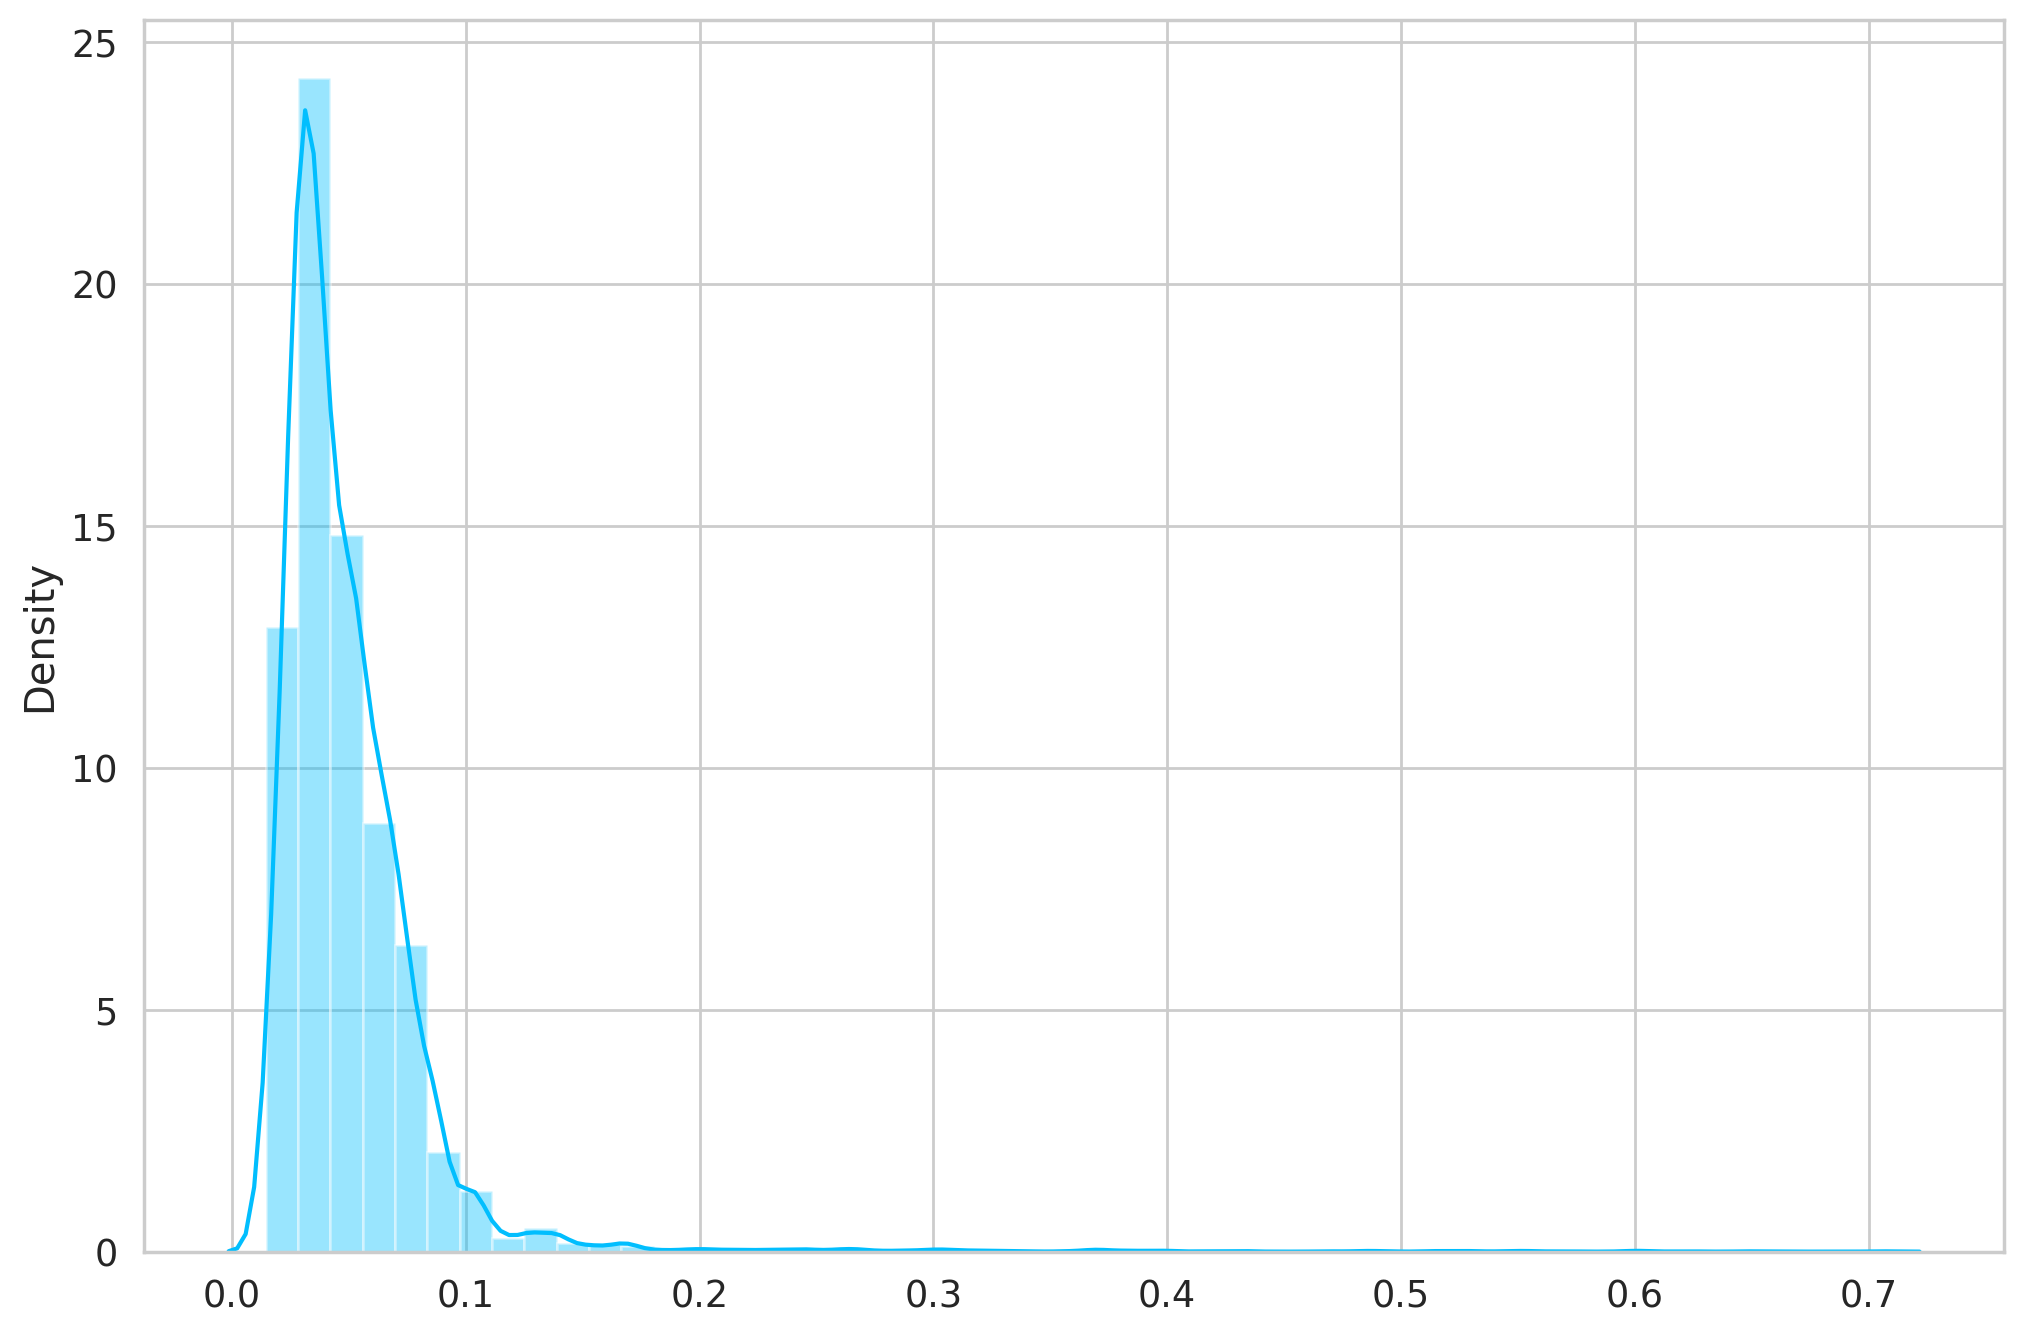

In [41]:
_, losses = predict(model, train_dataset)

sns.distplot(losses, bins=50, kde=True);

In [42]:
def predict(model, dataset):
  predictions, losses = [], []
  criterion = nn.L1Loss(reduction='sum').to(device)
  with torch.no_grad():
    model = model.eval()
    for seq_true in dataset:
      seq_true = seq_true.to(device)
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)

      predictions.append(seq_pred.cpu().numpy().flatten())
      losses.append(loss.item())
  return predictions, losses

In [43]:
THRESHOLD = 0.7

<ipython-input-44-7ad4ed70e59d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_pred_losses, bins=50, kde=True);


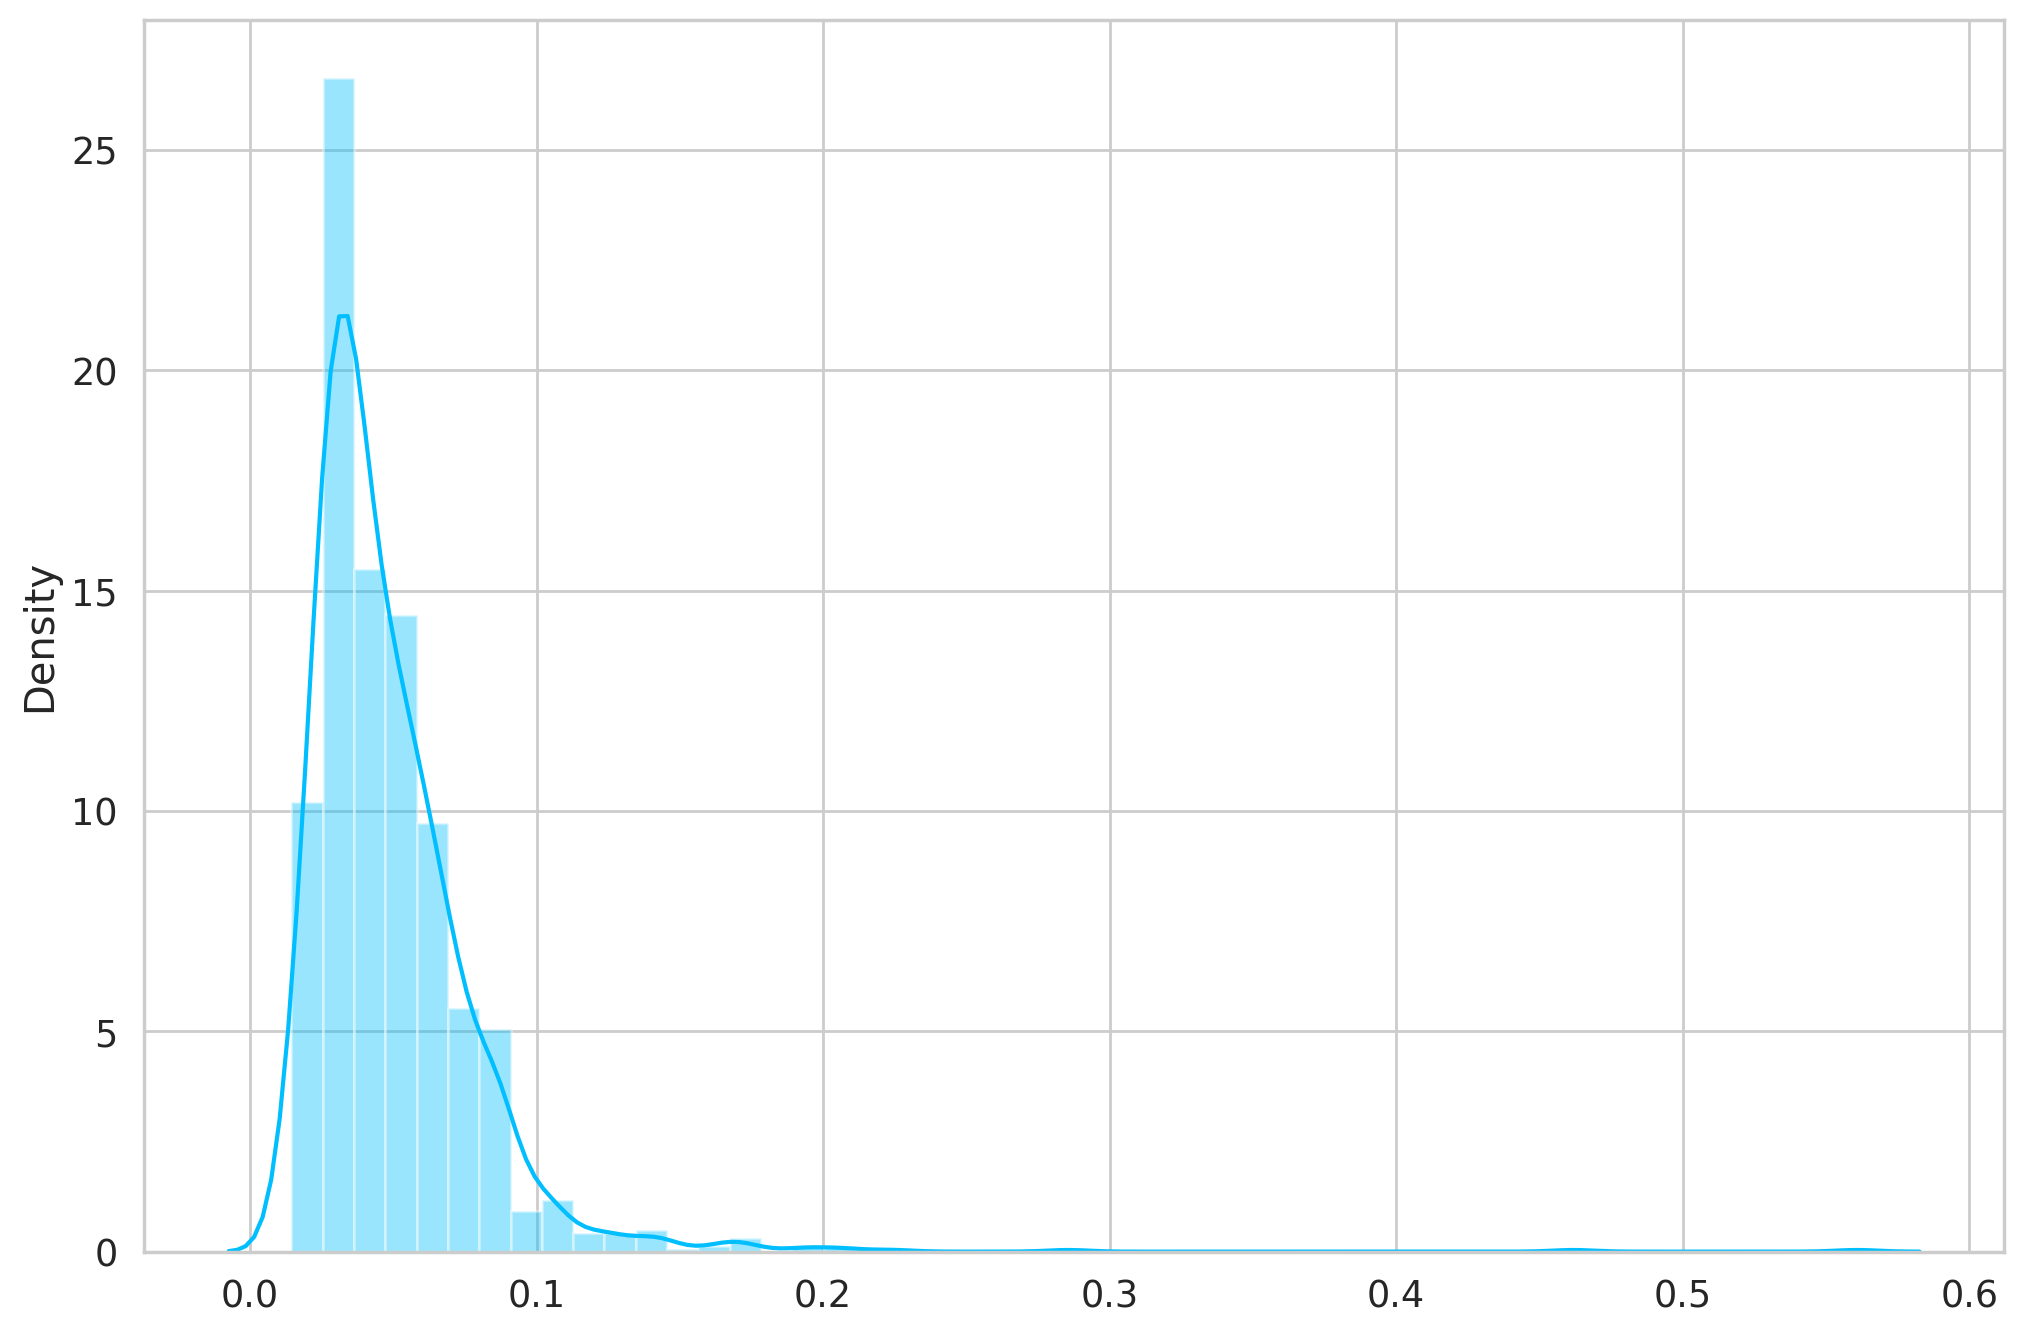

In [44]:
predictions, normal_pred_losses = predict(model, test_normal_dataset)
sns.distplot(normal_pred_losses, bins=50, kde=True);

In [45]:
correct = sum(l <= THRESHOLD for l in normal_pred_losses)
#print(correct)
print(f'Correct normal predictions: {correct}/{len(test_normal_dataset)}')

Correct normal predictions: 1488/1488


In [46]:
anomaly_dataset = test_anomaly_dataset[:len(test_normal_dataset)]

<ipython-input-47-267385b09434>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anom_pred_losses, bins=50, kde=True);


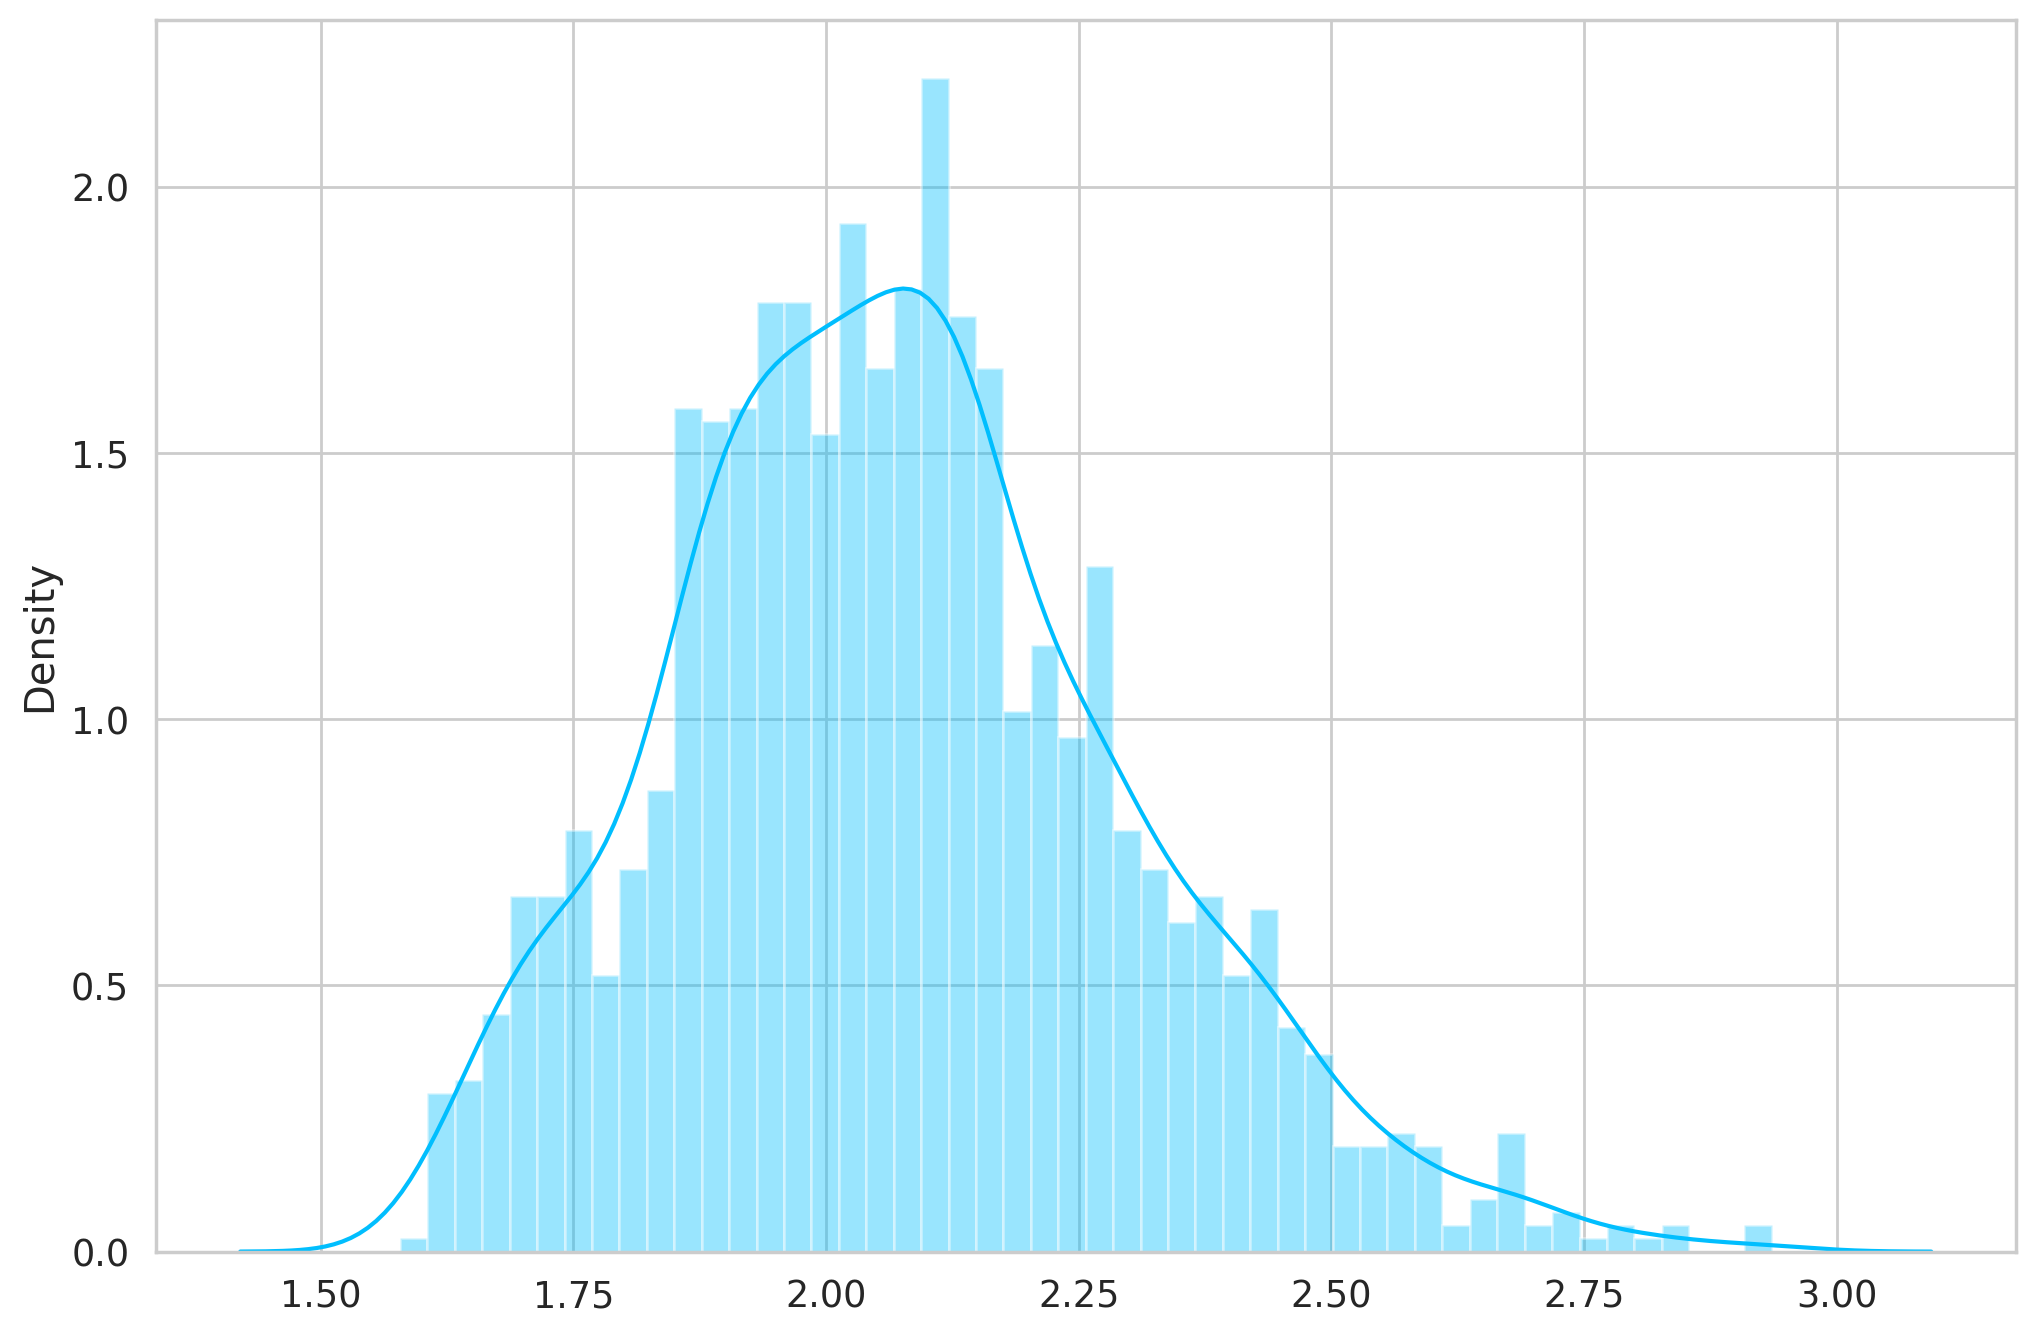

In [47]:
predictions, anom_pred_losses = predict(model, anomaly_dataset)
sns.distplot(anom_pred_losses, bins=50, kde=True);

In [48]:
correct = sum(l > THRESHOLD for l in anom_pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(anomaly_dataset)}')

Correct anomaly predictions: 1488/1488


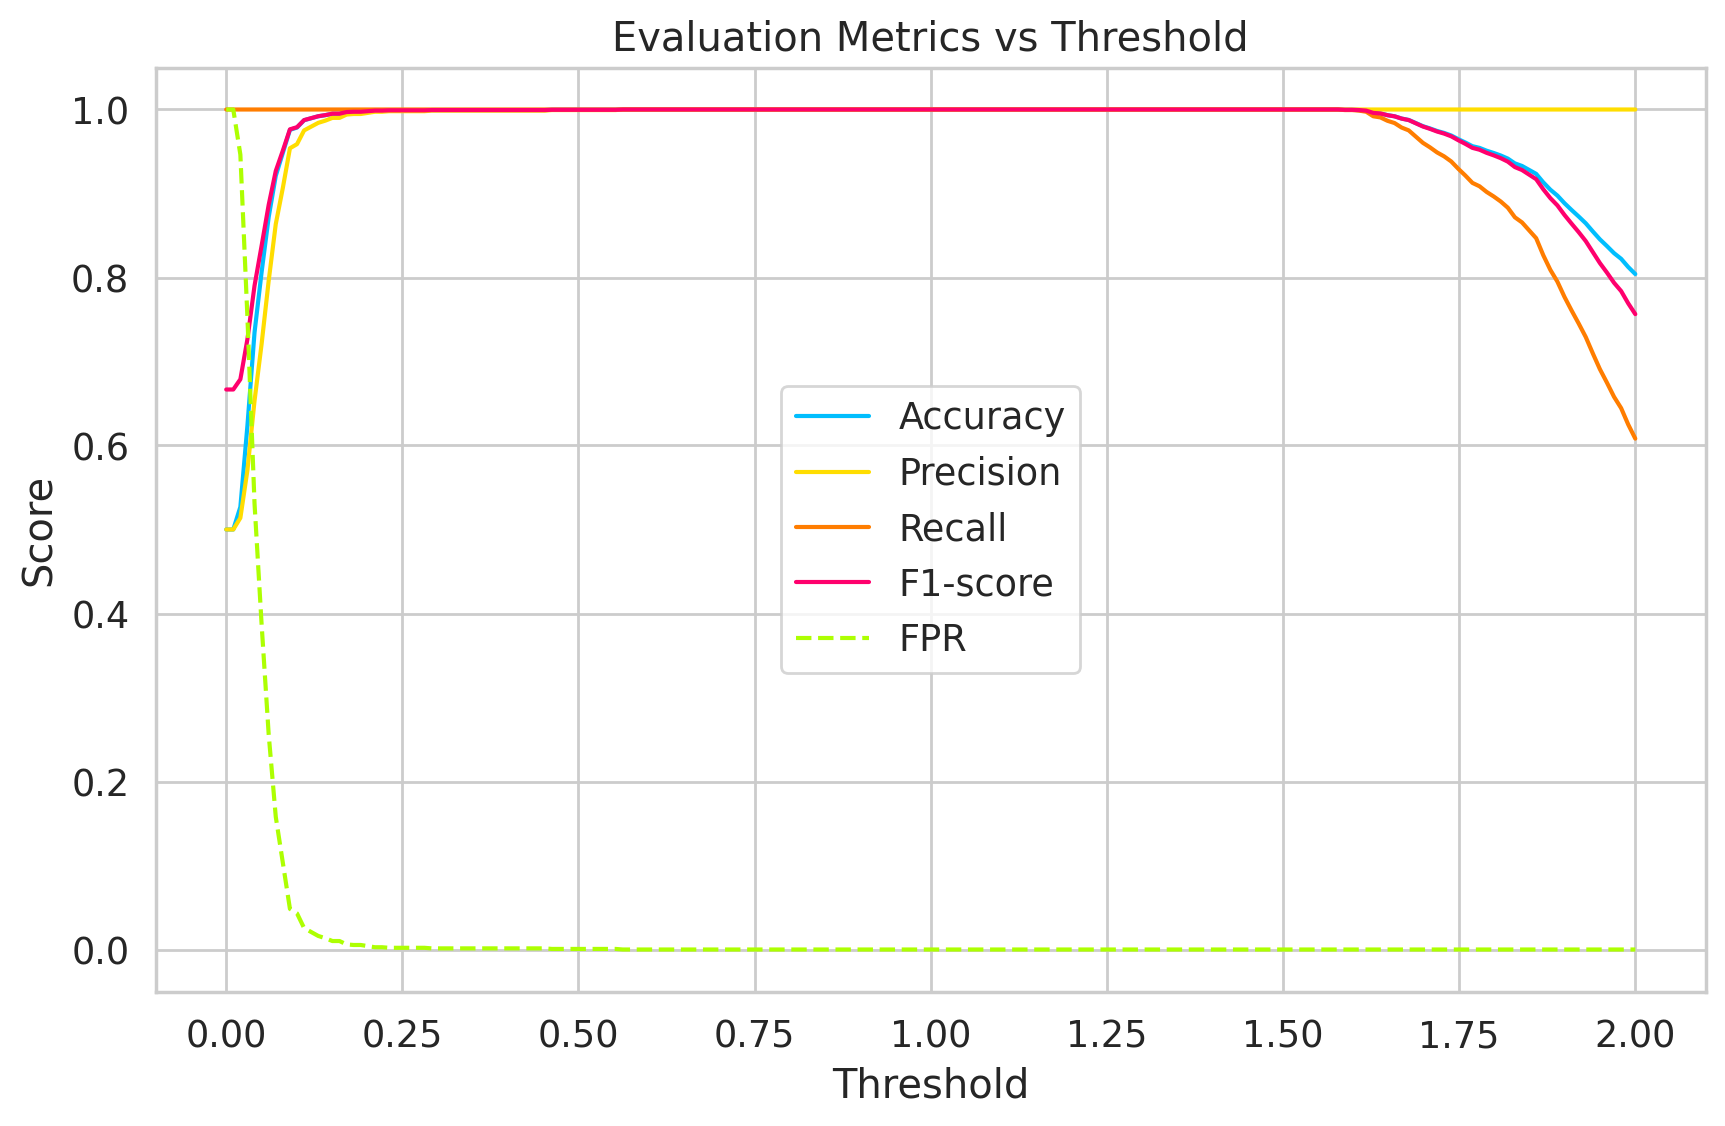

In [49]:
import numpy as np
import matplotlib.pyplot as plt

thresholds = np.linspace(0, 2, 200)

accuracies = []
precisions = []
recalls = []
f1_scores = []
fprs = []

for threshold in thresholds:
    TP = np.sum(anom_pred_losses > threshold)
    FN = np.sum(anom_pred_losses <= threshold)
    FP = np.sum(normal_pred_losses > threshold)
    TN = np.sum(normal_pred_losses <= threshold)

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    fpr = FP / (FP + TN) if (FP + TN) > 0 else 0

    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
    f1_scores.append(f1)
    fprs.append(fpr)

# Plotta
plt.figure(figsize=(10,6))
plt.plot(thresholds, accuracies, label='Accuracy')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-score')
plt.plot(thresholds, fprs, label='FPR', linestyle='--')  # Lägg till FPR
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Evaluation Metrics vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
def plot_prediction(data, model, title, ax):
  predictions, pred_losses = predict(model, [data])

  ax.plot(data, label='true')
  ax.plot(predictions[0], label='reconstructed')
  ax.set_title(f'{title} (loss: {np.around(pred_losses[0], 2)})')
  ax.legend()

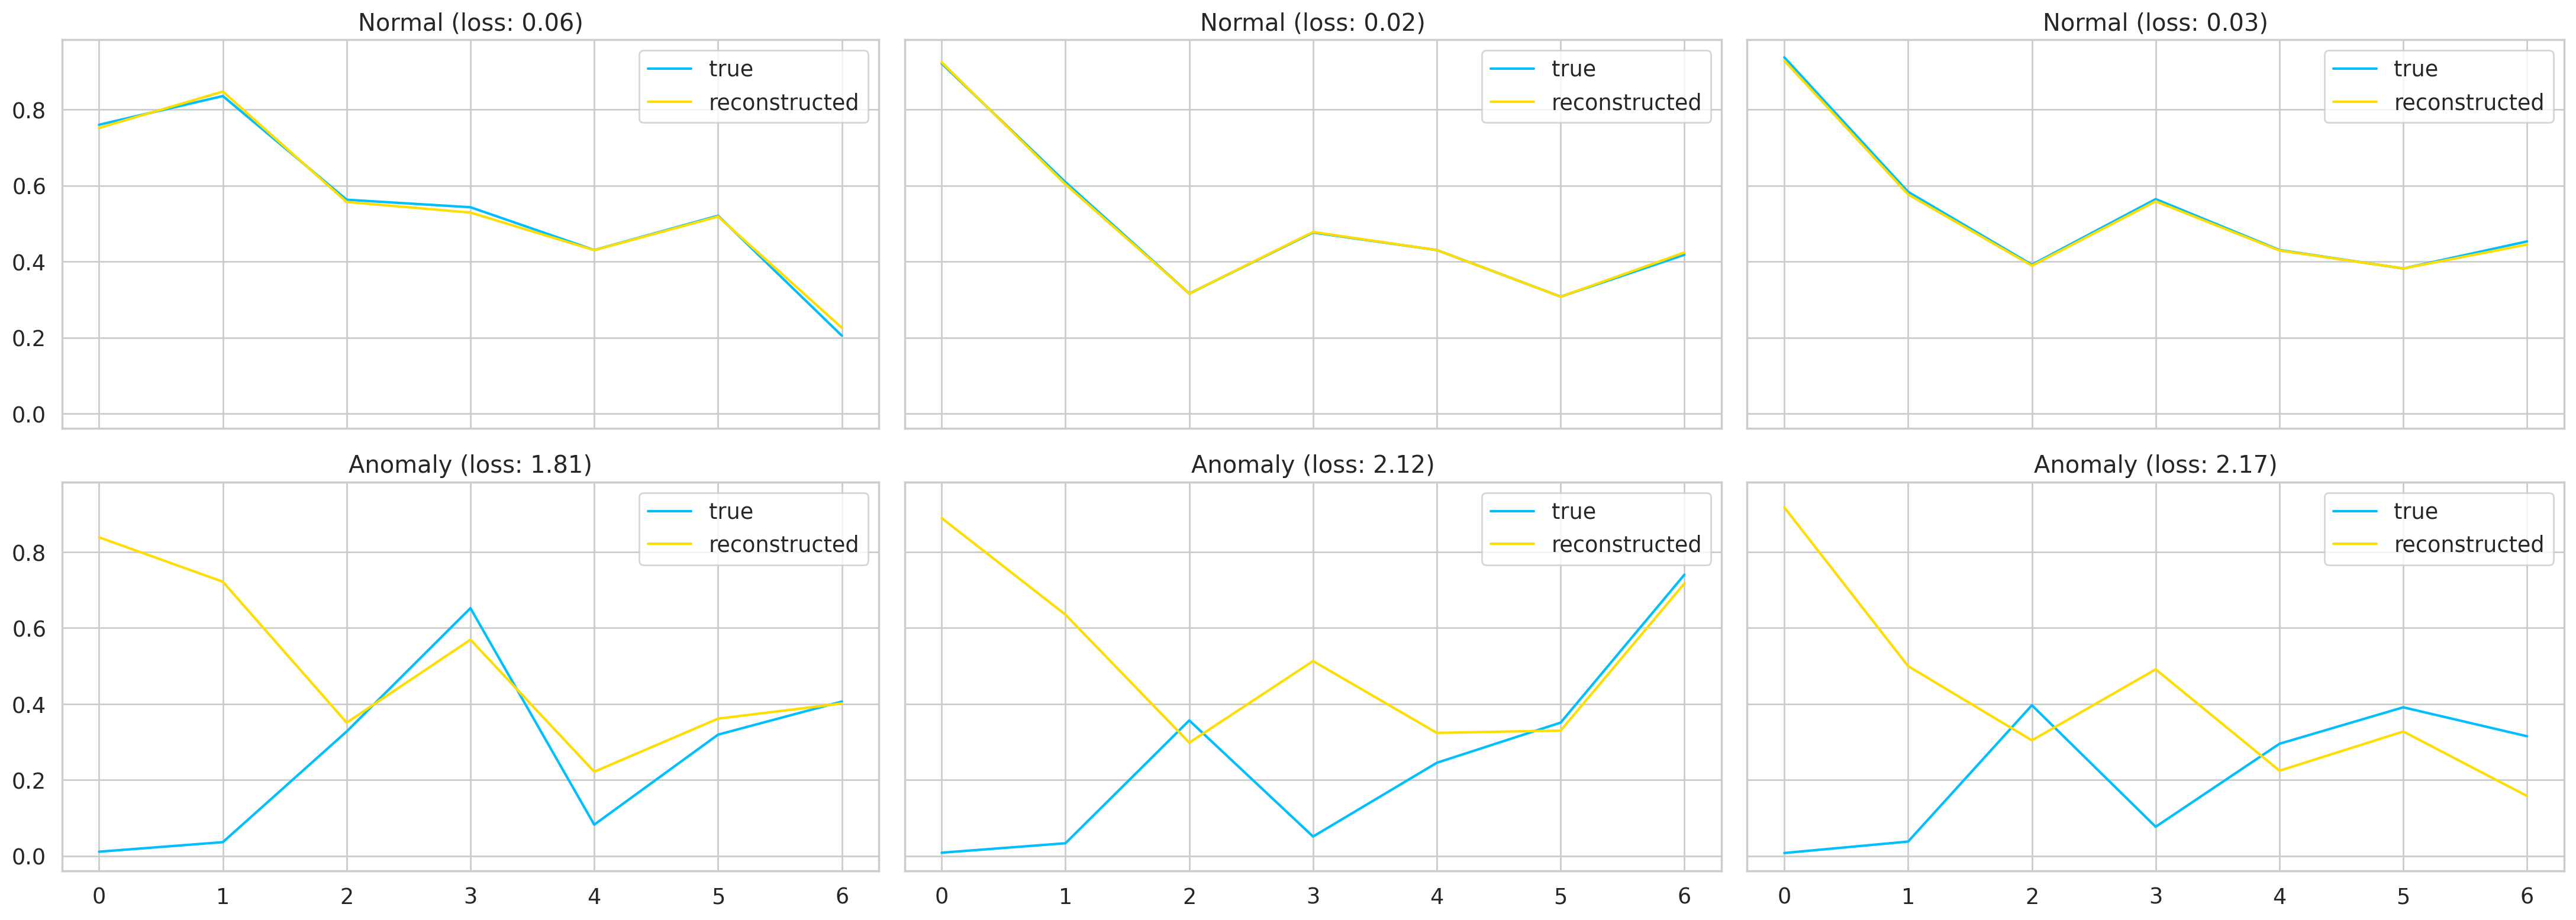

In [51]:
fig, axs = plt.subplots(
  nrows=2,
  ncols=3,
  sharey=True,
  sharex=True,
  figsize=(22, 8)
)

for i, data in enumerate(test_normal_dataset[:3]):
  plot_prediction(data, model, title='Normal', ax=axs[0, i])

for i, data in enumerate(test_anomaly_dataset[:3]):
  plot_prediction(data, model, title='Anomaly', ax=axs[1, i])

fig.tight_layout();

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 1. Generera prediktioner för både normala och anomala data
preds_normal, losses_normal = predict(model, test_normal_dataset)
preds_anom, losses_anom = predict(model, test_anomaly_dataset)

# 2. Skapa ground truth och prediktioner
y_true = [0] * len(losses_normal) + [1] * len(losses_anom)  # 0 = normal, 1 = anomaly
y_pred = [1 if loss > THRESHOLD else 0 for loss in losses_normal] + \
         [1 if loss > THRESHOLD else 0 for loss in losses_anom]

# 3. Räkna ut metrik
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, losses_normal + losses_anom)

# 4. FPR från confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
fpr = fp / (fp + tn)

# 5. Skriv ut alla värden
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall (TPR): {recall:.4f}")
print(f" FPR: {fpr:.4f}")
print(f" F1-score: {f1:.4f}")
print(f" AUC-ROC: {auc:.4f}")

 Accuracy: 1.0000
 Precision: 1.0000
 Recall (TPR): 1.0000
 FPR: 0.0000
 F1-score: 1.0000
 AUC-ROC: 1.0000


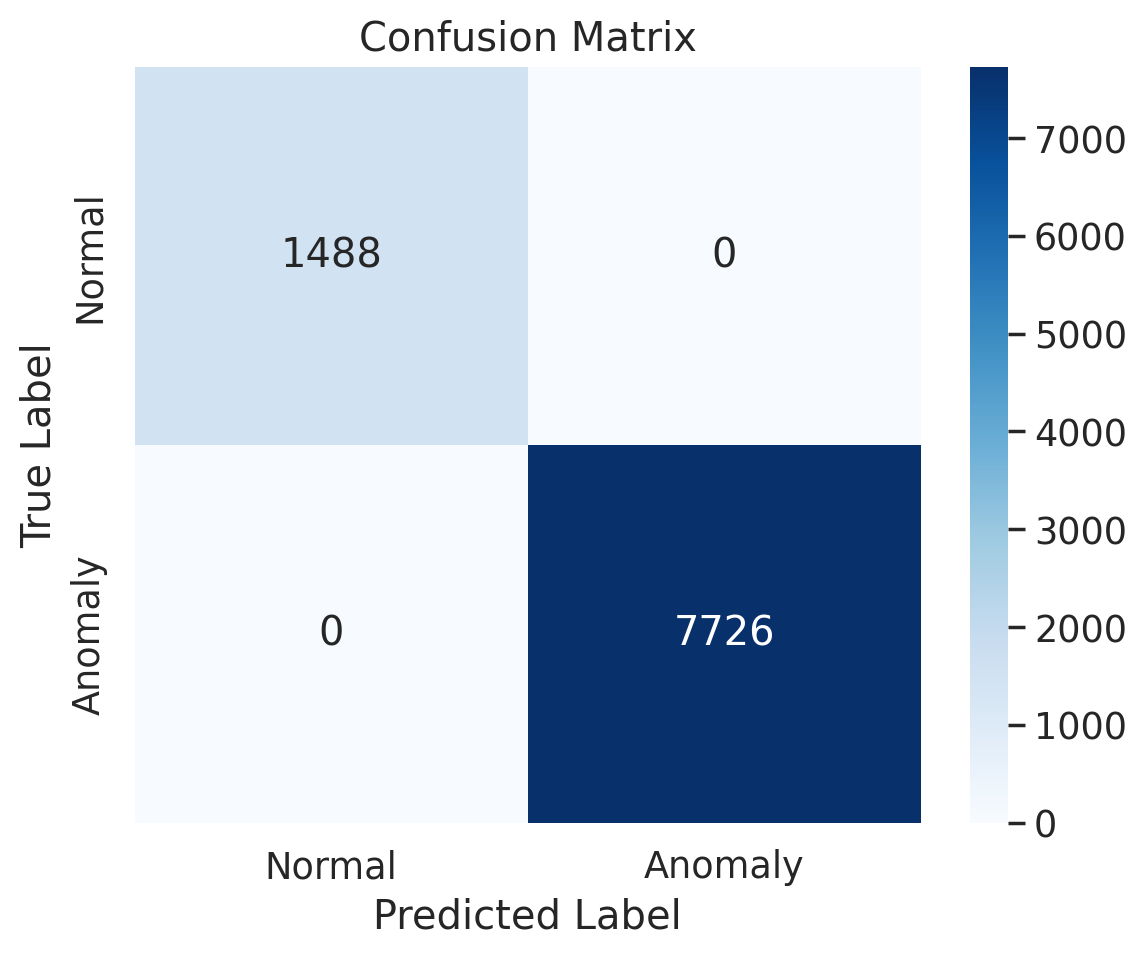

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
#plt.savefig("7030/confusion_matrix.png", dpi=300)
plt.show()

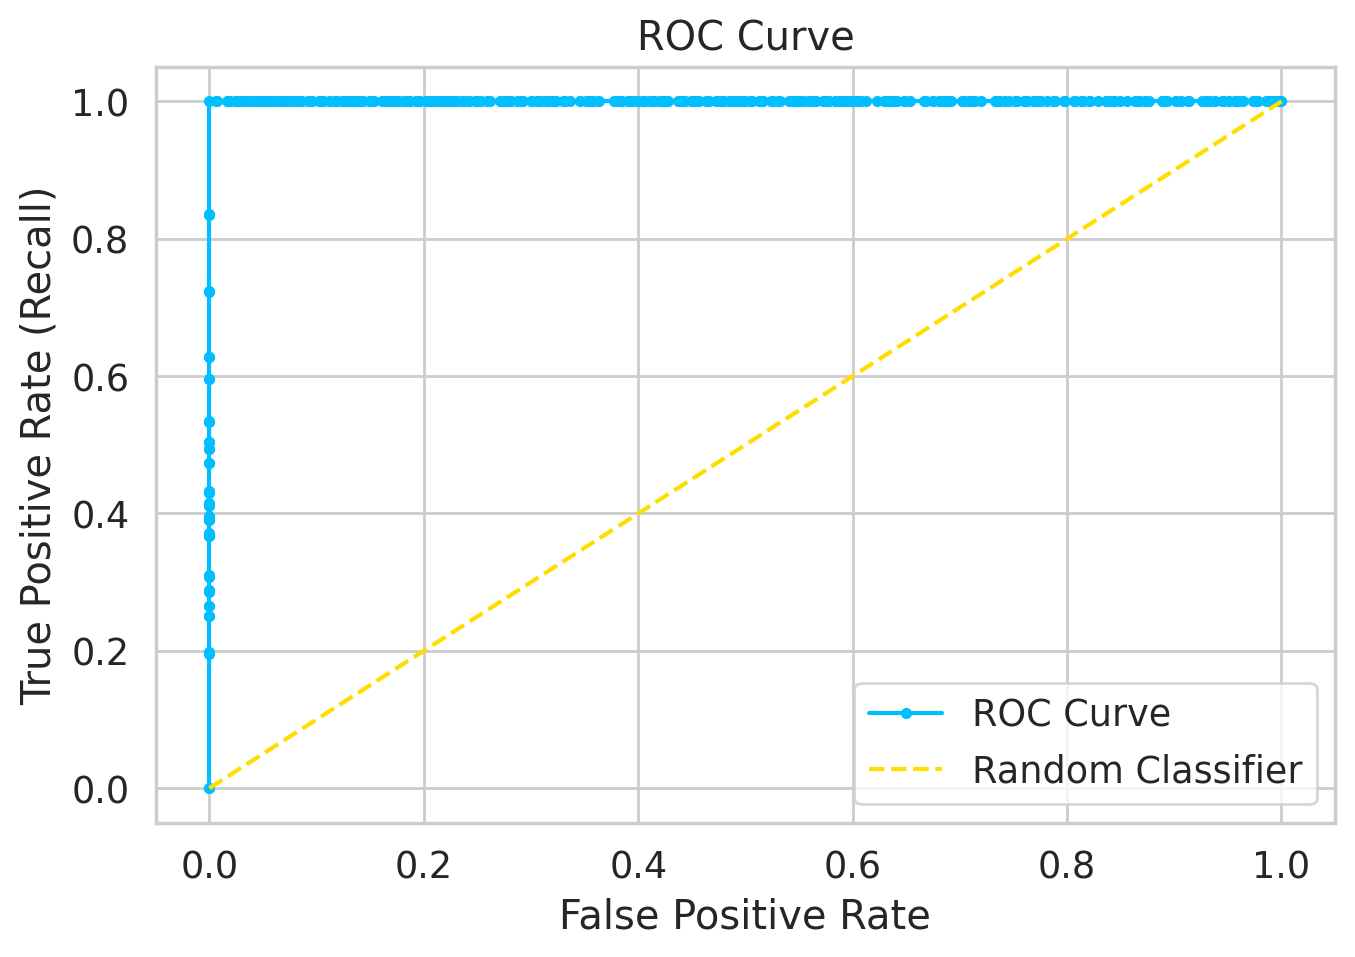

In [54]:
from sklearn.metrics import roc_curve

# ROC använder sanningsetiketter och rekonstruktionsfel (som "scores")
fpr, tpr, thresholds = roc_curve(y_true, losses_normal + losses_anom)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig("7030/roc_curve.png", dpi=300)
plt.show()

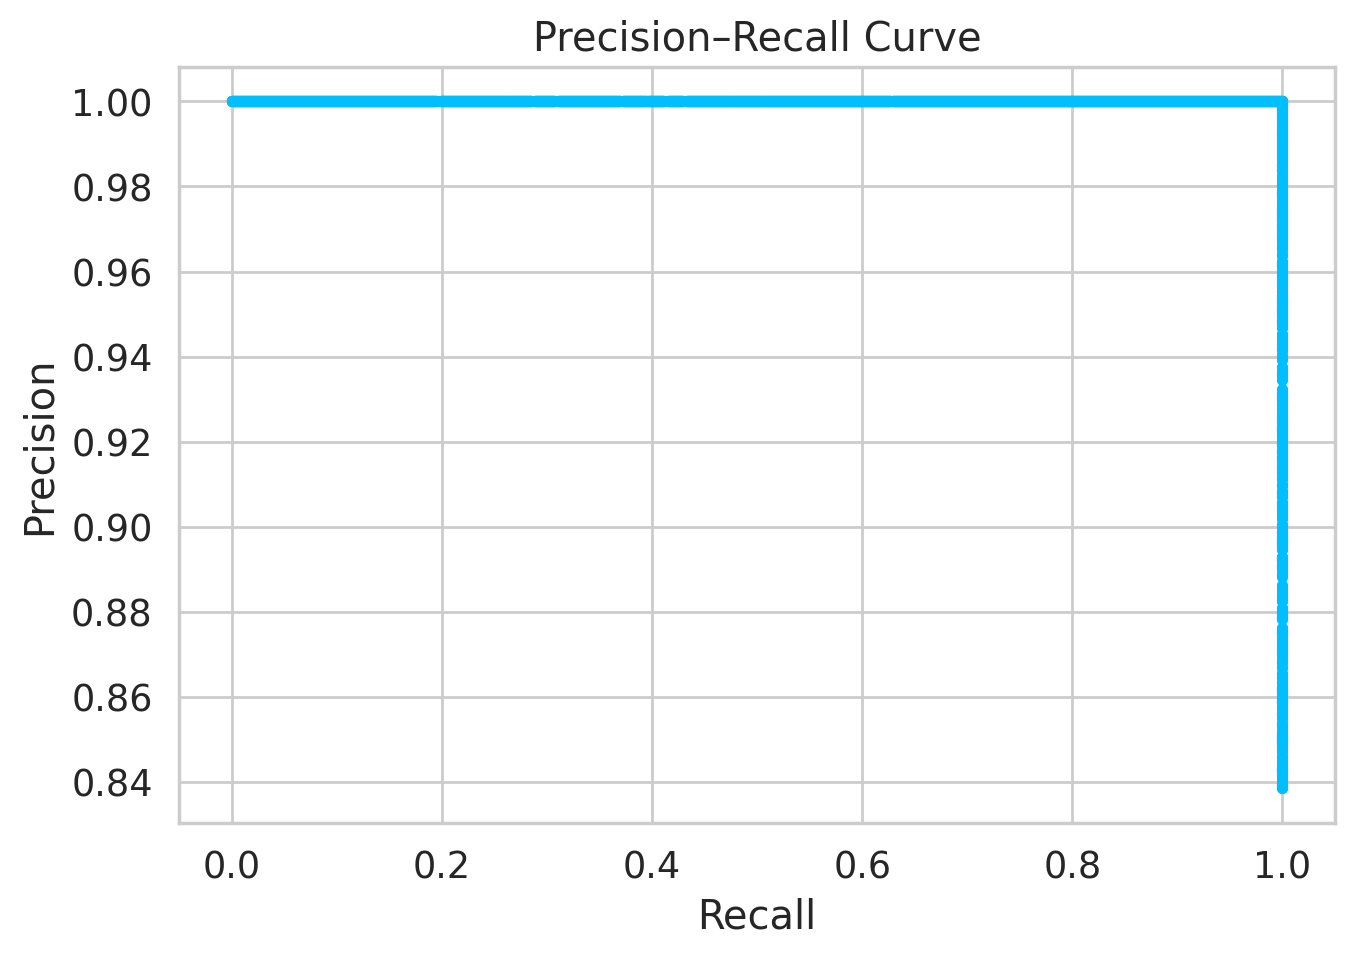

In [55]:
from sklearn.metrics import precision_recall_curve

precision_vals, recall_vals, _ = precision_recall_curve(y_true, losses_normal + losses_anom)

plt.figure(figsize=(7, 5))
plt.plot(recall_vals, precision_vals, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.grid(True)
plt.tight_layout()
#plt.savefig("7030/precision_recall_curve.png", dpi=300)
plt.show()

In [56]:
import numpy as np
import shap

background_data = np.array([x.cpu().numpy().reshape(-1) for x in train_dataset])
test_data = np.array([x.cpu().numpy().reshape(-1) for x in test_normal_dataset]).astype(np.float32)
test_data_anom = np.array([x.cpu().numpy().reshape(-1) for x in test_anomaly_dataset]).astype(np.float32)
background_summary = shap.kmeans(background_data, 100)
np.random.seed(42)

normal_indices = np.random.choice(len(test_data), size=500, replace=False)
anom_indices = np.random.choice(len(test_data_anom), size=500, replace=False)

test_data_subset = test_data[normal_indices]
test_data_anom_subset = test_data_anom[anom_indices]

np.save("data/background_data_subset.npy", background_summary.data)
np.save("data/test_data_norm_subset.npy", test_data_subset)
np.save("data/test_data_anom_subset.npy", test_data_anom_subset)